In [1]:
!unzip /content/drive/MyDrive/bollywood_celeb_faces.zip

Archive:  /content/drive/MyDrive/bollywood_celeb_faces.zip
   creating: bollywood_celeb_faces/Aishwarya_Rai/
  inflating: bollywood_celeb_faces/Aishwarya_Rai/1.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/100.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/101.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/102.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/103.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/104.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/105.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/106.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/107.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/108.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/109.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/11.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/110.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/111.jpg  
  inflating: bollywood_celeb_faces/Aishwarya_Rai/112.jpg  
  inflati

In [2]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 4.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
import cv2 
import os
import pickle
import sys

In [5]:
img = cv2.imread('/content/bollywood_celeb_faces/Katrina_Kaif/5.jpg',12)

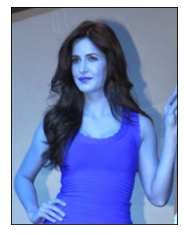

In [6]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
X_images = []
X_persname = []
X_labels = []
cnt = 0
folderpath = '/content/bollywood_celeb_faces/'
for imgfolder in os.listdir(folderpath):
  if os.path.isdir(folderpath + imgfolder + '/' +'.ipynb_checkpoints/'):
    os.rmdir(folderpath + imgfolder + '/' +'.ipynb_checkpoints/')
  ##print(imgfolder)
  for filename in os.listdir(folderpath + imgfolder):
    filename = folderpath + imgfolder + '/' + filename
    img = cv2.imread(filename,0)
    if img is not None:
      img = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
      X_images.append(img)
      X_labels.append(cnt)
  cnt += 1
  X_persname.append(imgfolder)
X_images = np.asarray(X_images)
X_labels = np.asarray(X_labels)
X_images.shape

(1446, 100, 100)

In [8]:
X_persname

['Kareena_Kapoor',
 'Aishwarya_Rai',
 'Kiara_Advani',
 'Preity_Zinta',
 'Prachi_Desai',
 'Juhi_Chawla',
 'Jacqueline_Fernandez',
 'Kriti_Sanon',
 'Kajal_Aggarwal',
 'Katrina_Kaif']

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_images,X_labels,test_size=0.2,random_state=42)

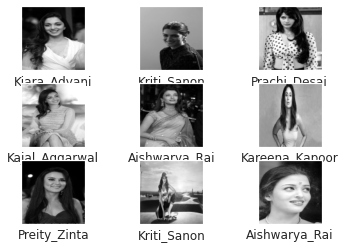

In [10]:
%matplotlib inline
import seaborn as sns; sns.set()
fig,ax = plt.subplots(3,3)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_train[i], cmap = 'gray')
    axis.set(xticks = [], yticks=[], xlabel=X_persname[y_train[i]])

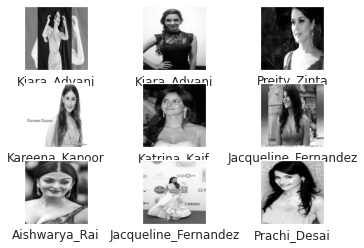

In [11]:
fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=X_persname[y_test[i]])

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) /255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) /255

In [13]:
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(C = 50,gamma=.1, kernel='poly')
clf.fit(X_train,y_train)


SVM Classifier with gamma = 0.1; Kernel = polynomial

Pickling the Classifier for Future Use...


SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(X_test)


Making Predictions on Test Input Images...


In [35]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test,test_labels_pred)
print('accuracy','%.4f'%acc)


Calculating Accuracy of Trained Classifier on Test Data... 
accuracy 0.2345


In [16]:
print('\n Creating Confusion Matrix for Test Data...')
con_mat = np.zeros((10,10))
for i in range(len(y_test)):
  con_mat[y_test[i]][test_labels_pred[i]] += 1


 Creating Confusion Matrix for Test Data...


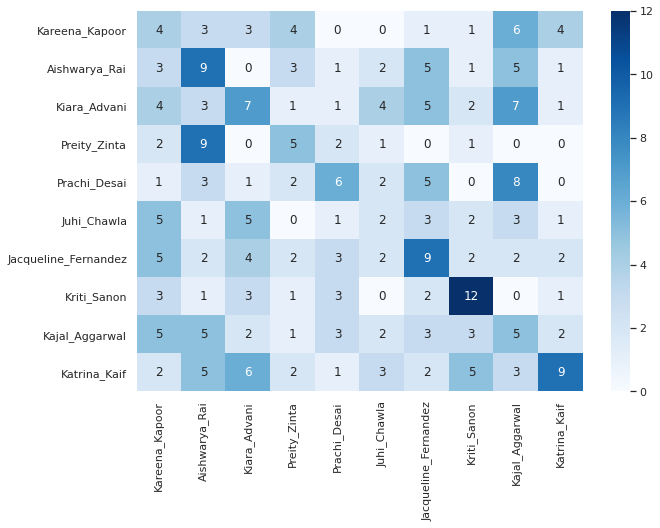

In [17]:
con_mat_df = pd.DataFrame(con_mat, index = [i for i in X_persname],
                  columns = [i for i in X_persname])
plt.figure(figsize = (10,7))
sns.heatmap(con_mat_df, annot=True, fmt='g',cmap='Blues')

In [18]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
TP = np.diag(con_mat)
TN = con_mat.sum() - (FP + FN + TP)

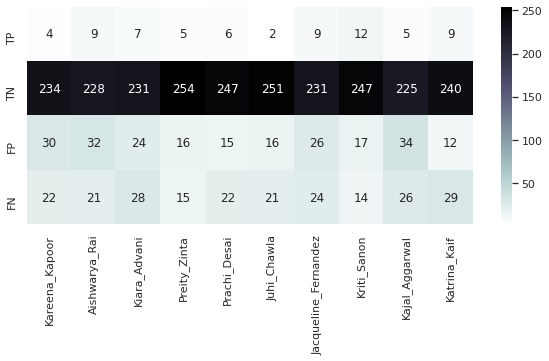

In [19]:
tfr_mat_df = pd.DataFrame((TP,TN,FP,FN),  columns = [i for i in X_persname],
                  index = [i for i in ['TP','TN','FP','FN']])
plt.figure(figsize = (10,4))
sns.heatmap(tfr_mat_df, annot=True, fmt='g',cmap='bone_r')


In [37]:
mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=2, random_seed=1)

In [38]:
mse, bias, var

(16.42241379310345, 13.321551724137931, 3.100862068965517)

In [22]:
cm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

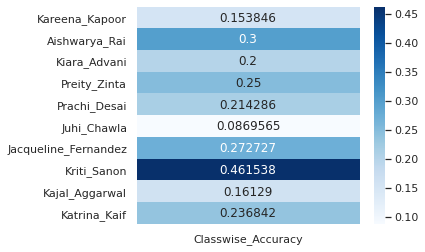

In [34]:
cls_acc_df = pd.DataFrame(list(cm.diagonal()),  columns = ['Classwise_Accuracy'],
                  index = [i for i in X_persname])
plt.figure(figsize = (5,4))
sns.heatmap(cls_acc_df, annot=True, fmt='g',cmap='Blues')